# Zomato EDA & Feature Engineering

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [5]:
df=pd.read_csv('zomato.csv',encoding='latin-1')

In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.size

200571

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [14]:
df.shape

(9551, 21)

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

  *Missing Value found in columns 

In [19]:
[i for i in df.columns  if df[i].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

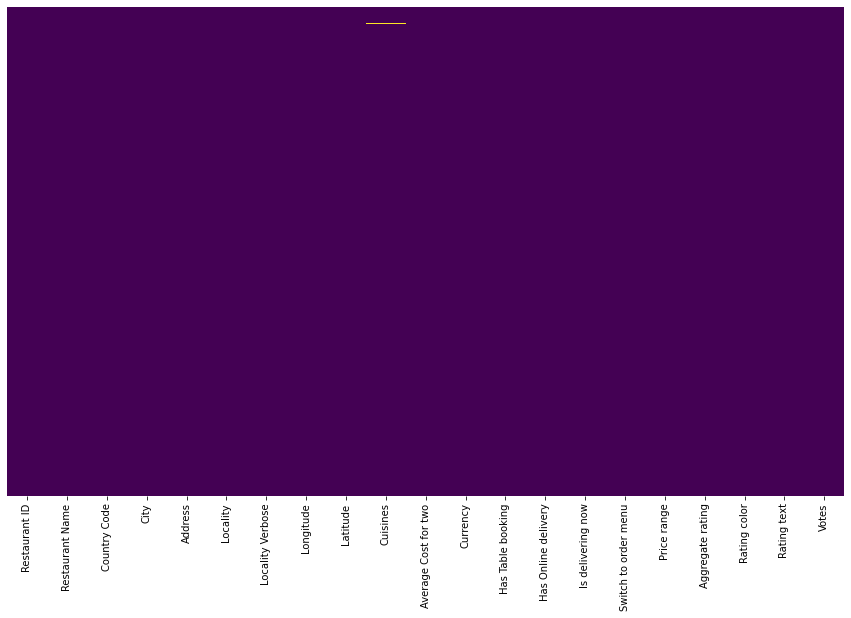

In [22]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [23]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [29]:
final_df=pd.merge(df,df_country,how='left',on='Country Code')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# Now Checking the final data frame data types

In [30]:

final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

# Checking All country and its value order 
 1. which top 3 country have high demand 
 2. which least  country have less demand 


In [31]:
country_names=final_df.Country.value_counts().index

In [32]:
country_names

Index(['India', 'United States', 'United Kingdom', 'UAE', 'South Africa',
       'Brazil', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [35]:
country_values=final_df.Country.value_counts().values

In [53]:
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

### Creating Pie chart to show Top 3 country have more order in percentage 

([<matplotlib.patches.Wedge at 0x26f1672dbe0>,
 [Text(-1.0829742700952103, 0.19278674827836725, '8652'),
  Text(1.077281715838356, -0.22240527134123297, '434'),
  Text(1.0995865153823035, -0.03015783794312073, '80')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

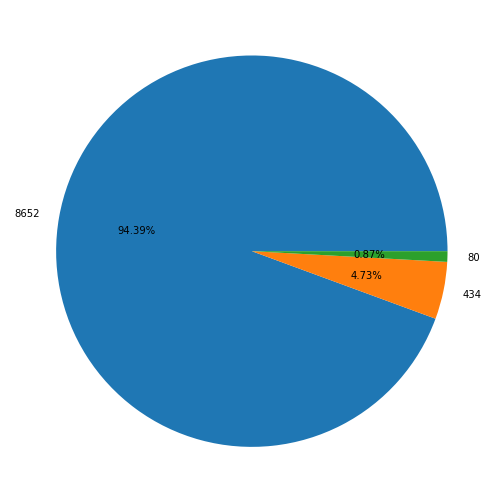

In [52]:
plt.figure(figsize=(15, 9))
plt.pie(country_values[:3],labels=country_names[:3],autopct='%1.2f%%')


In [54]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Country wise Name of Restaurant    Rating Analysis

In [72]:
restruent=final_df.groupby(['Country','Restaurant Name','Aggregate rating']).size().reset_index().rename(columns={0:'Rating Count'})

In [74]:
restruent.head()

,Country,Restaurant Name,Aggregate rating,Rating Count
0,Australia,1918 Bistro & Grill,4.4,1
1,Australia,5 Little Pigs,4.1,1
2,Australia,Anchorage Cafe Restaurant Wine Bar,3.6,1
3,Australia,Beach Box Cafe,3.7,1
4,Australia,Bespoke Harvest,3.7,1


In [82]:
SortValue=restruent.sort_values(by=['Aggregate rating'], ascending=False).head(10)
SortValue

,Country,Restaurant Name,Aggregate rating,Rating Count
8293,United States,Atlanta Highway Seafood Market,4.9,1
4337,India,Masala Library,4.9,1
8184,UAE,Punjab Grill,4.9,1
8202,UAE,Tresind - Nassima Royal Hotel,4.9,1
8211,United Kingdom,Bao,4.9,1
8224,United Kingdom,Duck & Waffle,4.9,1
8228,United Kingdom,Flat Iron,4.9,1
8265,United Kingdom,Solita,4.9,1
4781,India,Naturals Ice Cream,4.9,1
4469,India,Mirchi And Mime,4.9,1


## Observation

### Top 5 Restruent

 1. In Top 1 Restaurant Name {Atlanta Highway Seafood Market}--> Country--> {United States}-->Rating-->4.9 -->4.9
 2. In Top 2 Restaurant Name {Masala Library}--> Country {India}  Rating4 -->4.9
 3. In Top 3 Restaurant Name {Punjab Grill}--> Country {UAE} Rating4 -->4.9
 4. In Top 4 Restaurant Name {Tresind - Nassima Royal Hotel}--> Country {UAE}  Rating4 -->4.9
 5. In Top 5 Restaurant Name {Bao} Country--> {United Kingdom}-->  Rating4 -->4.9




In [78]:
restruent.head()

,Country,Restaurant Name,Aggregate rating,Rating Count
0,Australia,1918 Bistro & Grill,4.4,1
1,Australia,5 Little Pigs,4.1,1
2,Australia,Anchorage Cafe Restaurant Wine Bar,3.6,1
3,Australia,Beach Box Cafe,3.7,1
4,Australia,Bespoke Harvest,3.7,1


# Top 5 Restruent And Country 

<AxesSubplot:xlabel='Aggregate rating', ylabel='Restaurant Name'>

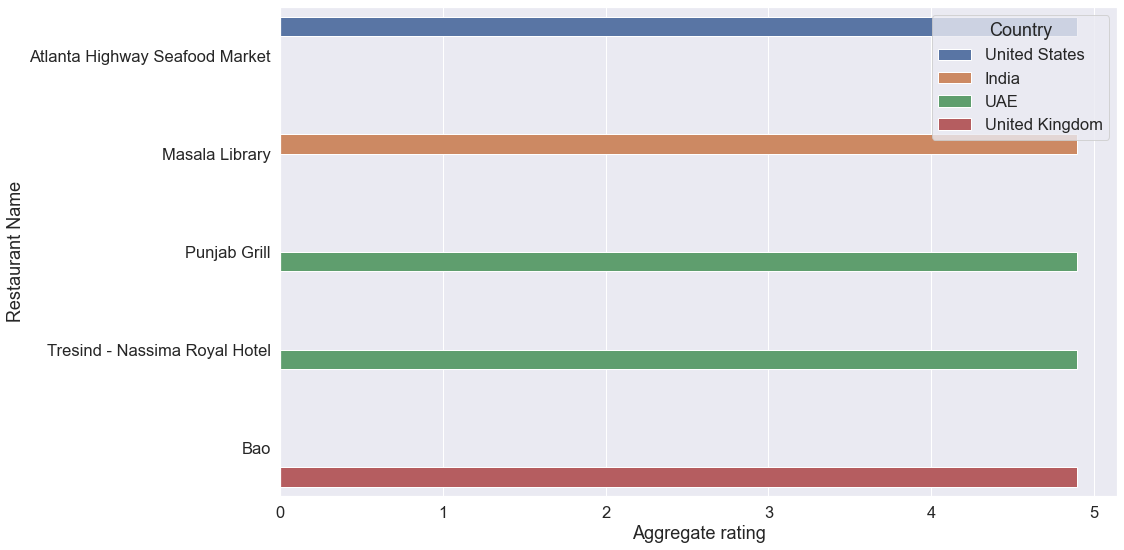

In [94]:
plt.figure(figsize=(15, 9))
sns.set(font_scale=1.5)
sns.barplot(x="Aggregate rating",y="Restaurant Name",hue='Country',data=SortValue.head(5))
# plt.show()

# Maximum Ratings Analysis

In [118]:
Most_of_Rating_trande=final_df.groupby(['Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating count"})

In [120]:
Most_of_Rating_trande

,Rating color,Rating text,Rating count
0,Dark Green,Excellent,301
1,Green,Very Good,1079
2,Orange,Average,3737
3,Red,Poor,186
4,White,Not rated,2148
5,Yellow,Good,2100


<AxesSubplot:xlabel='Rating text', ylabel='Rating count'>

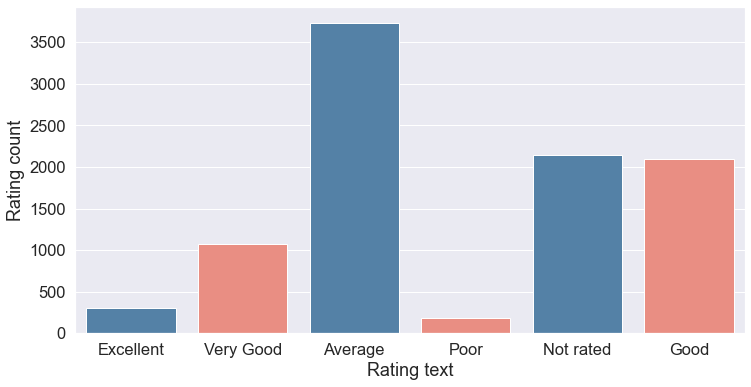

In [123]:
sns.barplot(x = "Rating text", y = "Rating count", data =Most_of_Rating_trande , palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"], n_colors = 4))

## Maximum Ratings Analysis

  - > Here Found poor Ratings ->186
  - > Most of the customer rated average ->3737
  - > Not Rated from customer side approx ->2148
  - > V good rating                       ->1079
  - > excelent ratings                   ->301
  - > Good ratings                        ->2100

# Minimum Ratings By Country Analysis

  

In [154]:
Minum_df=final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Min Rating count'})

In [155]:
Minum_df

,Country,Min Rating count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


## Minimum Ratings Analysis

  - > Not Rating Color from white colur 
  
  
  - > V good rating                       ->1079
  - > excelent ratings                   ->301
  - > Good ratings                        ->2100